# Exercício - Implementação do Perceptron

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from utils import gen_2D_gaussians
np.random.seed(321)

class myPerceptron:
    def __init__(
        self, 
        X: np.ndarray, 
        Y: np.ndarray, 
        eta: float, 
        tol: float, 
        max_epochs: int, 
        par=1
        ) -> None:
        """
        Perceptron class. 
        Adjusts model weight based on training data.

        Parameters:
        X (ndarray): input data
        Y (ndarray): target labels
        eta (float): learning rate
        tol (float): error tolerance
        max_epochs (int): maximum number of epochs
        """
        if par == 1:
            # Add bias term to the input data
            w = np.random.randn(X.shape[1] + 1)
            X = np.hstack((np.ones((X.shape[0], 1)), X))
        else:
            w = np.random.randn(X.shape[1])
        
        N = len(X)
        self.error_epoch = [tol + 1]
        self.n_epoch = [0]
        
        while self.n_epoch[-1] < max_epochs and \
            self.error_epoch[-1] > tol:
            xseq = np.random.permutation(N)
            ei2 = 0

            for i in range(N):
                i_rand = xseq[i]
                err = Y[i_rand] - np.sign(np.dot(w, X[i_rand, :]))
                w += eta * err * X[i_rand, :]
                ei2 += err ** 2
            self.error_epoch.append(ei2)
            self.n_epoch.append(self.n_epoch[-1] + 1)
        
        self.weights = w

    def predict(self, sample: np.ndarray, par=1) -> np.ndarray:
        """
        Predict sample class.

        Parameters:
        sample (ndarray): input data
        """
        if par == 1:
            # Add bias term to the input data
            sample = np.hstack(((1,), sample))
        output = np.dot(sample, self.weights)
        return 1 if output >= 0 else 0

## Geração de duas classes gaussianas sintéticas

Text(0.5, 1.0, 'Dataset sintético: Gaussianas 2D. n = 100 s = 0.3')

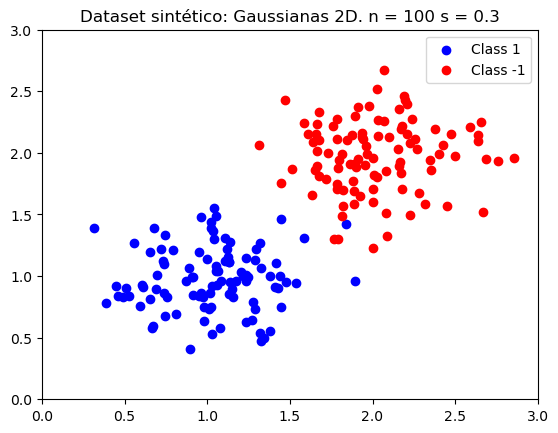

In [8]:
X, Y = gen_2D_gaussians()

plt.scatter(X[:100, 0], X[:100, 1], c='b', label='Class 1')
plt.scatter(X[100:, 0], X[100:, 1], c='r', label='Class -1')
plt.legend()
plt.xlim(0,3)
plt.ylim(0,3)
plt.title('Dataset sintético: Gaussianas 2D. n = 100 s = 0.3')


Text(0.5, 1.0, 'Erro de treinamento ao longo das épocas')

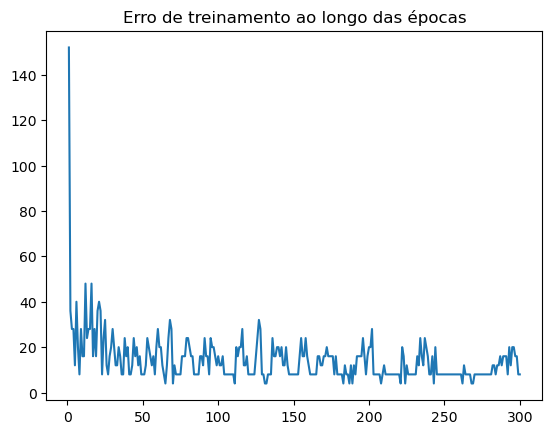

In [9]:
# Perceptron Training
perceptron = myPerceptron(X, Y, eta=0.1, tol=0.01, max_epochs=300)

# Plot error over each epoch (desconsidering first epoch)
plt.plot(perceptron.n_epoch[1:], perceptron.error_epoch[1:]) 
plt.title('Erro de treinamento ao longo das épocas')

## Separação da Superfíce pelo Perceptron

Text(0.5, 1.0, 'Superfície separada pelo perceptron')

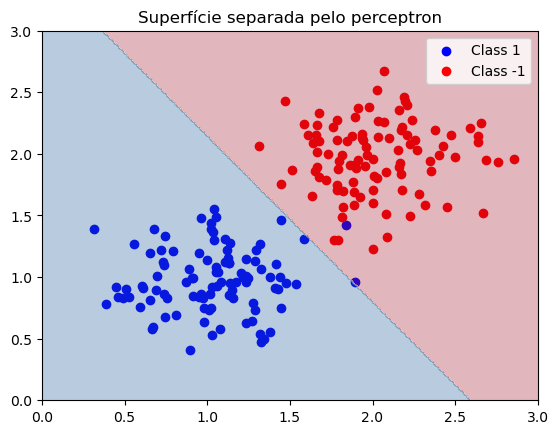

In [10]:
seqi = np.linspace(0, 3, 300)
seqj = np.linspace(0, 3, 300)
M1 = np.zeros((len(seqi), len(seqj)))
for i in range(len(seqi)):
    for j in range(len(seqj)):
        M1[i, j] = perceptron.predict(np.array([seqi[i], seqj[j]]))

plt.scatter(X[:100, 0], X[:100, 1], c='b', label='Class 1')
plt.scatter(X[100:, 0], X[100:, 1], c='r', label='Class -1')
plt.legend()
plt.xlim(0,3)
plt.ylim(0,3)
plt.contourf(seqi, seqj, M1, alpha=0.3, cmap=plt.cm.RdBu)
plt.title('Superfície separada pelo perceptron')